<a href="https://colab.research.google.com/github/MADDIPATIGOWTHAM/OIBSIP2/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/Iris.csv")

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.shape

(150, 6)

In [ ]:
df=df.drop(columns=['Id'])

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df['Species'].replace({"Iris-setosa":1,"Iris-versicolor":2,"Iris-virginica":3},inplace=True)

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


In [ ]:
df2=pd.DataFrame(df,columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]).values

In [ ]:
df2

In [ ]:
y=df.Species.values.reshape(-1,1)

In [ ]:
ys

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df2_train,df2_test,y_train,y_test=train_test_split(df2,y,test_size=0.3,random_state=42)

In [ ]:
df2_train.shape

(105, 4)

In [ ]:
y_train.shape

(105, 1)

In [ ]:
k=6

In [ ]:
kn=KNeighborsClassifier(k)

In [ ]:
kn.fit(df2_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
Y_pred=kn.predict(df2_test)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
Y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1])

In [ ]:
y_test=y_test.reshape(-1)

In [ ]:
y_test

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1,
       1])

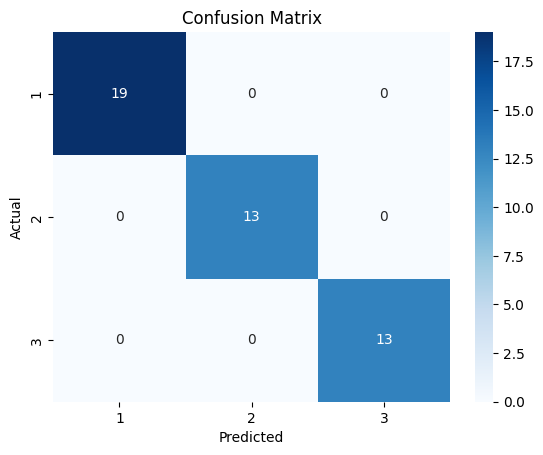

In [ ]:
conf_mat = confusion_matrix(y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()